# IDMP - Final Project -  Data Integration Pipeline for IOT Sensor Data

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



    This function generates synthetic IoT sensor data for a given number of samples.
    Each sample consists of a time series with multiple features. The function also introduces
    faults in the data with a given probability and different types of anomalies in the sensor readings.

    Parameters:
    - num_samples (int): The number of data samples to generate (default is 5000).
    - time_steps (int): The number of time steps for each data sample (default is 50).
    - num_features (int): The number of features (sensors) for each data sample (default is 12).
    - fault_probability (float): The probability that a sample will have a fault (default is 0.2).

    Returns:
    - X (numpy.ndarray): A 3D array of shape (num_samples, time_steps, num_features) representing the
                          sensor data, with possible faults (anomalies).
    - y (numpy.ndarray): A 1D array of shape (num_samples,) containing binary labels, where 1 indicates
                          a faulty sample and 0 indicates a normal sample.


In [152]:
import numpy as np
import matplotlib.pyplot as plt

def generate_iot_sensor_data(num_samples=5000, time_steps=50, num_features=12, fault_probability=0.2):

    X = np.zeros((num_samples, time_steps, num_features))
    y = np.zeros(num_samples)

    for i in range(num_samples):
        normal_sequence = np.random.normal(loc=0.5, scale=0.1, size=(time_steps, num_features))
        X[i] = normal_sequence
        if np.random.rand() < fault_probability:
            y[i] = 1
            num_faulty_features = np.random.randint(1, num_features // 2 + 1)
            faulty_features = np.random.choice(num_features, num_faulty_features, replace=False)
            for feature in faulty_features:
                anomaly_type = np.random.choice(["spike", "drift"])
                if anomaly_type == "spike":
                    X[i, :, feature] += np.random.normal(loc=2, scale=0.5, size=time_steps)
                elif anomaly_type == "drift":
                    X[i, :, feature] += np.linspace(0, np.random.uniform(1, 2), time_steps)

    return X, y


num_samples = 1000
time_steps = 50
num_features = 6
fault_probability = 0.3

X, y = generate_iot_sensor_data(num_samples, time_steps, num_features, fault_probability)

print(f"Data shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

Data shape (X): (1000, 50, 6)
Labels shape (y): (1000,)


## Saving the loading the dataset into a CSV file

#### Function: `save_to_csv`

- **Parameters**:
  - `X`: 3D array of shape `(num_samples, time_steps, num_features)` containing sensor data.
  - `y`: 1D array of shape `(num_samples,)` containing labels (1 for faulty, 0 for normal).
  - `filename`: Output CSV file name (default is `"iot_sensor_dataset.csv"`).

- **Process**:
  1. **Flatten**: Reshape `X` into 2D (`num_samples, time_steps * num_features`).
  2. **Combine**: Stack the flattened data with labels `y`.
  3. **Column Naming**: Generate sensor column names like `"Sensor_i_Tj"`.
  4. **Save**: Create a pandas DataFrame and save it as a CSV file.

- **Output**: A CSV file containing the sensor data and labels.


In [153]:
import pandas as pd

def save_to_csv(X, y, filename="iot_sensor_dataset.csv"):

    num_samples, time_steps, num_features = X.shape
    X_flattened = X.reshape(num_samples, time_steps * num_features)

    data = np.hstack((X_flattened, y.reshape(-1, 1)))

    feature_columns = [f"Sensor_{i}_T{j}" for i in range(num_features) for j in range(time_steps)]
    columns = feature_columns + ["Label"]
    df = pd.DataFrame(data, columns=columns)

    # Save to CSV
    df.to_csv(filename, index=False)
    print(f"Dataset saved to {filename}")

save_to_csv(X, y, filename="iot_sensor_dataset.csv")


Dataset saved to iot_sensor_dataset.csv


In [154]:
filename = "iot_sensor_dataset.csv"
data = pd.read_csv(filename)
print(data.shape)
data.info


(1000, 301)


<bound method DataFrame.info of      Sensor_0_T0  Sensor_0_T1  Sensor_0_T2  Sensor_0_T3  Sensor_0_T4  \
0       0.539690     0.573059     0.502756     0.367415     0.517904   
1       0.406028     2.198776     0.544606     0.502379     0.504412   
2       0.474658     0.516575     0.519297     0.320544     0.752486   
3       0.793831     0.455614     0.417628     0.389542     0.663583   
4       0.589560     3.724895     0.509113     0.558897     0.460013   
..           ...          ...          ...          ...          ...   
995     0.521788     0.446953     0.412613     0.440998     0.507902   
996     0.561531     0.637438     0.584543     0.534124     0.554074   
997     0.516085     0.717084     0.542794     0.603306     0.596033   
998     0.568653     0.554760     0.671961     0.722717     2.100670   
999     0.482953     0.300987     0.581772     0.712510     0.575598   

     Sensor_0_T5  Sensor_0_T6  Sensor_0_T7  Sensor_0_T8  Sensor_0_T9  ...  \
0       0.354343     0.346000     0.492913     0.507515     0.681239  ...   
1       0.427919     0.528964     3.693560     0.485006     0.707156  ...   
2       0.558079     0.444698     0.360844     0.402180     0.576796  ...   
3       0.488466     0.472501     0.390259     0.385675     0.511390  ...   
4       0.398432     0.345752     2.536753     0.334421     0.451556  ...   
..           ...          ...          ...          ...          ...  ...   
995     0.665931     0.366708     0.754385     0.470981     0.404588  ...   
996     0.529911     0.382688     0.395905     0.653397     0.517350  ...   
997     0.318994     0.562475     0.642903     0.469343     0.298625  ...   
998     0.568267     0.629962     0.516149     0.429383     0.502334  ...   
999     0.536150     0.547589     0.415378     0.581042     0.577612  ...   

     Sensor_5_T41  Sensor_5_T42  Sensor_5_T43  Sensor_5_T44  Sensor_5_T45  \
0        0.519150      0.551433      0.438677      0.424585      0.447593   
1        0.598852      1.854238      0.442287      0.525015      2.193789   
2        0.423988      0.448186      0.462942      0.593246      0.587470   
3        0.612330      0.584618      0.520368      0.526649      0.407730   
4        0.358030      0.539587      0.540227      0.618075      2.954940   
..            ...           ...           ...           ...           ...   
995      0.349395      0.591639      0.752948      0.377911      0.610165   
996      0.513998      0.389079      0.618129      0.364758      0.534161   
997      0.537387      0.443000      0.472717      0.509171      0.487552   
998      0.573341      2.694521      0.643485      0.547840      0.539493   
999      0.419920      0.539610      1.897712      0.347377      1.705537   

     Sensor_5_T46  Sensor_5_T47  Sensor_5_T48  Sensor_5_T49  Label  
0        0.646303      0.557062      0.504327      0.645319    0.0  
1        2.040863      0.748603      1.772247      0.517400    1.0  
2        0.507198      0.720181      0.506013      0.551981    0.0  
3        2.351007      0.467361      0.651571      0.465714    1.0  
4        0.355596      0.575579      0.486009      0.483379    1.0  
..            ...           ...           ...           ...    ...  
995      0.465248      0.571480      0.520631      0.695297    0.0  
996      0.555029      0.400843      0.483141      0.436557    0.0  
997      0.333859      0.539050      0.473798      0.555748    0.0  
998      0.521657      0.401103      2.539714      0.597463    1.0  
999      0.506847      0.419655      0.599275      2.095234    1.0  

[1000 rows x 301 columns]>

In [155]:
data.describe()

,Sensor_0_T0,Sensor_0_T1,Sensor_0_T2,Sensor_0_T3,Sensor_0_T4,Sensor_0_T5,Sensor_0_T6,Sensor_0_T7,Sensor_0_T8,Sensor_0_T9,...,Sensor_5_T41,Sensor_5_T42,Sensor_5_T43,Sensor_5_T44,Sensor_5_T45,Sensor_5_T46,Sensor_5_T47,Sensor_5_T48,Sensor_5_T49,Label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.608189,0.596807,0.577532,0.604284,0.599922,0.581992,0.612456,0.601124,0.580601,0.613204,...,0.694725,0.672013,0.629271,0.678099,0.678169,0.650997,0.687065,0.669686,0.633837,0.293000
std,0.481916,0.437438,0.406599,0.451694,0.463989,0.414753,0.487411,0.468152,0.425857,0.496115,...,0.590804,0.547176,0.480452,0.553093,0.543631,0.530427,0.574252,0.548020,0.499184,0.455366
min,0.133569,0.141737,0.212289,0.175192,0.213819,0.199141,0.196804,0.170951,0.224609,0.162545,...,0.243048,0.171416,0.206099,0.184148,0.093378,0.167814,0.227688,0.186849,0.186811,0.000000
25%,0.442244,0.441593,0.439146,0.434965,0.432095,0.439559,0.435724,0.445328,0.438056,0.437969,...,0.440879,0.440694,0.442375,0.440422,0.447520,0.436129,0.436239,0.441082,0.438035,0.000000
50%,0.510787,0.511977,0.508904,0.509869,0.504786,0.504382,0.511375,0.504024,0.505988,0.507105,...,0.515452,0.518052,0.507378,0.516267,0.521722,0.507095,0.515375,0.513437,0.508518,0.000000
75%,0.580612,0.585581,0.577048,0.584938,0.584035,0.581197,0.582325,0.579797,0.575745,0.585061,...,0.598947,0.595520,0.581976,0.601501,0.605664,0.589257,0.597590,0.593886,0.590351,1.000000
max,3.566259,3.724895,3.727169,3.443209,3.463468,3.881032,3.601398,3.693560,3.723905,3.666992,...,3.895424,3.878557,3.352653,3.388831,3.722318,3.238004,4.132183,3.772746,3.848727,1.000000


# Preprocessing On the Data

## Standardization of the data

#### Function: `manual_standardization`
- **Process**:
  1. **Calculate Means**: Compute the mean of each feature (column) across all samples.
  2. **Calculate Standard Deviations**: Compute the standard deviation of each feature across all samples.
  3. **Standardize**: Subtract the mean and divide by the standard deviation for each feature to standardize the data.

- **Output**: A standardized version of the input data, where each feature has a mean of 0 and a standard deviation of 1.


In [135]:
def manual_standardization(data):
    means = data.mean(axis=0)
    std_devs = data.std(axis=0)
    standardized_data = (data - means) / std_devs
    return standardized_data

## Data Reshaping

#### Function: `reshape_data`
- **Process**:
  1. **Check Divisibility**: Ensure the number of samples is divisible by `time_steps`.
  2. **Reshape**: Reshape the data into a 3D array with shape `(num_samples // time_steps, time_steps, num_features)`, where each sequence has `time_steps` and the data is split accordingly.

- **Output**: A 3D array of shape `(num_sequences, time_steps, num_features)` representing the reshaped data.


In [136]:
def reshape_data(features, time_steps=50):
    num_samples = len(features)
    num_features = features.shape[1]
    if num_samples % time_steps != 0:
        raise ValueError("Number of samples must be divisible by time_steps for reshaping.")

    reshaped_data = features.values.reshape(num_samples // time_steps, time_steps, num_features)
    return reshaped_data


## Splitting of the Data for training and testing

#### Function: `train_test_split_manual`

- **Process**:
  1. **Shuffle Indices**: Generate a random permutation of indices to shuffle the data.
  2. **Split Data**: Divide the data and labels into training and testing sets based on the specified `test_size`.
  3. **Return**: Return the training and testing data (`X_train`, `X_test`) and corresponding labels (`y_train`, `y_test`).

- **Output**: Four arrays: `X_train`, `X_test`, `y_train`, `y_test`, representing the training and testing data and labels.


In [137]:
def train_test_split_manual(data, labels, test_size=0.2):
    num_samples = len(data)
    indices = np.random.permutation(num_samples)
    split_idx = int(num_samples * (1 - test_size))
    X_train = data[indices[:split_idx]]
    X_test = data[indices[split_idx:]]

    y_train = labels.iloc[indices[:split_idx]]
    y_test = labels.iloc[indices[split_idx:]]

    return X_train, X_test, y_train, y_test

## Class Weight Computation
#### Function: `compute_class_weights`
- **Process**:
  1. **Count Classes**: Compute the frequency of each class using `value_counts`.
  2. **Calculate Weights**: Calculate the weight for each class as the inverse of its frequency, normalized by the total number of samples and the number of unique classes.
  3. **Return Weights**: Return a dictionary where keys are class labels and values are the corresponding class weights.

- **Output**: A dictionary with class labels as keys and their respective weights as values.



In [138]:
def compute_class_weights(labels):
    class_counts = labels.value_counts()
    total_samples = len(labels)
    class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}
    return class_weights

## Data Preprocessing Pipeline

#### Function: `preprocess_data`

- **Process**:
  1. **Extract Labels**: The "Label" column is separated from the features.
  2. **Standardize Features**: The features are standardized using the `manual_standardization` function.
  3. **Reshape Data**: The standardized features are reshaped into a 3D array for time series analysis using the `reshape_data` function.
  4. **Train-Test Split**: The data is split into training and testing sets using the `train_test_split_manual` function.
  5. **Compute Class Weights**: Class weights are calculated using the `compute_class_weights` function to address any class imbalance.

- **Output**: The function returns:
  - `X_train`: Training data features.
  - `X_test`: Testing data features.
  - `y_train`: Training data labels.
  - `y_test`: Testing data labels.
  - `class_weights`: A dictionary containing class weights for balancing training.


In [156]:
def preprocess_data(data, time_steps=50):
    labels = data["Label"]
    features = data.drop(columns=["Label"])
    standardized_features = manual_standardization(features)
    reshaped_data = reshape_data(standardized_features, time_steps)
    X_train, X_test, y_train, y_test = train_test_split_manual(reshaped_data, labels)
    class_weights = compute_class_weights(y_train)
    return X_train, X_test, y_train, y_test, class_weights

X_train, X_test, y_train, y_test, class_weights = preprocess_data(data)

print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")
print(f"Class weights: {class_weights}")



Train data shape: (16, 50, 300), Test data shape: (4, 50, 300)
Class weights: {0.0: 0.8, 1.0: 1.3333333333333333}


# Data Visualization

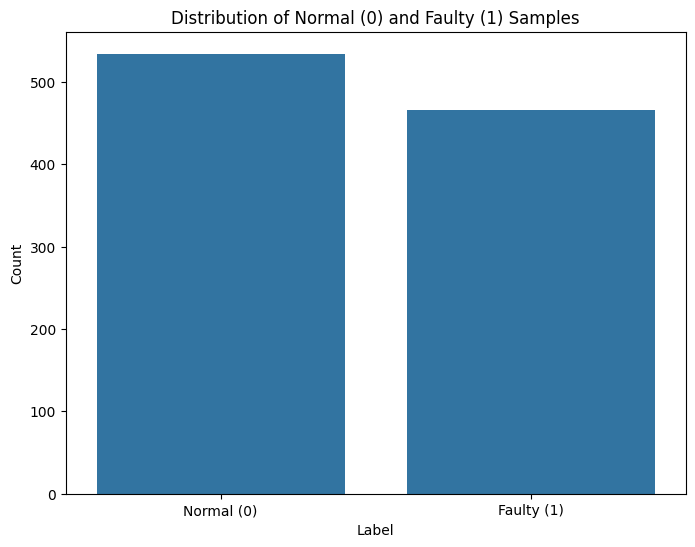

In [140]:
# Plot for understanding distribution of Noraml and Faulty Sample

plt.figure(figsize=(8, 6))
sns.countplot(x=data['Label'])
plt.title("Distribution of Normal (0) and Faulty (1) Samples")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'Faulty (1)'])
plt.show()


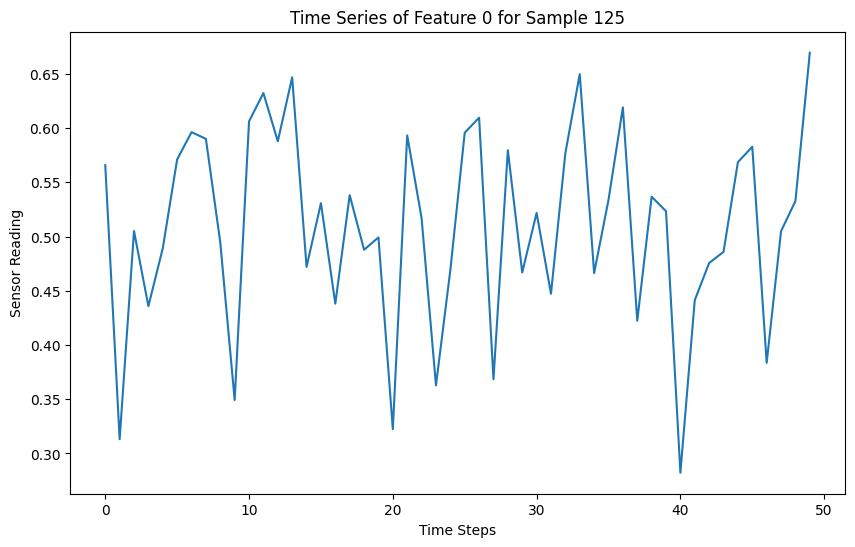

In [157]:
# For visualizing how a single feature behaves over time,

random_sample_idx = np.random.randint(0, len(data))
feature_idx = 0
time_steps = 50

plt.figure(figsize=(10, 6))
plt.plot(data.iloc[random_sample_idx, 1:time_steps+1].values)
plt.title(f"Time Series of Feature {feature_idx} for Sample {random_sample_idx}")
plt.xlabel("Time Steps")
r = 65
plt.ylabel("Sensor Reading")
plt.show()

# LSTM Model for Classification

In [142]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


## LSTM Model Structure and Compilation

#### Function: `create_improved_lstm_model`

- **Parameters**:
  - `input_shape`: A tuple representing the shape of the input data (excluding batch size), typically `(time_steps, num_features)` for time series data.

- **Process**:
  1. **First Bidirectional LSTM Layer**: Adds a Bidirectional LSTM layer with 100 units and the `return_sequences=True` option to output the entire sequence for the next layer.
  2. **Dropout**: Applies a dropout rate of 0.3 after the first LSTM layer to prevent overfitting.
  3. **Second Bidirectional LSTM Layer**: Adds another Bidirectional LSTM layer with 100 units.
  4. **Dropout**: Applies a dropout rate of 0.3 after the second LSTM layer.
  5. **Final LSTM Layer**: Adds a final LSTM layer with 50 units and `return_sequences=False` to output only the last time step.
  6. **Dropout**: Applies a dropout rate of 0.3 after the last LSTM layer.
  7. **Dense Layer**: Adds a dense layer with 1 unit and a sigmoid activation function for binary classification.

- **Output**: The function returns the compiled LSTM model.


In [158]:
def create_improved_lstm_model(input_shape):
    model = Sequential()


    model.add(Bidirectional(LSTM(units=200, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(units=1, activation='sigmoid'))

    return model

In [159]:
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_improved_lstm_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [160]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_23 (Bidirectional)     │ (None, 50, 400)             │         801,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 50, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_24 (Bidirectional)     │ (None, 50, 200)             │         400,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 50, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 50)                  │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,252,651 (4.78 MB)

 Trainable params: 1,252,651 (4.78 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6250 - loss: 0.6755 - val_accuracy: 0.7500 - val_loss: 0.5654
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8125 - loss: 0.5051 - val_accuracy: 0.7500 - val_loss: 0.5379
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.8125 - loss: 0.4488 - val_accuracy: 0.7500 - val_loss: 0.5344
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.8750 - loss: 0.3159 - val_accuracy: 0.7500 - val_loss: 0.5295
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step - accuracy: 1.0000 - loss: 0.2387 - val_accuracy: 0.7500 - val_loss: 0.5274
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step - accuracy: 1.0000 - loss: 0.1706 - val_accuracy: 0.5000 - val_loss: 0.5380
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 1.0000 - loss: 0.1326 - val_accuracy: 0.5000 - val_loss: 0.5804
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - accuracy: 1.0000 - loss: 0.0942 - val_accuracy: 0.5000 - val_loss: 0.6

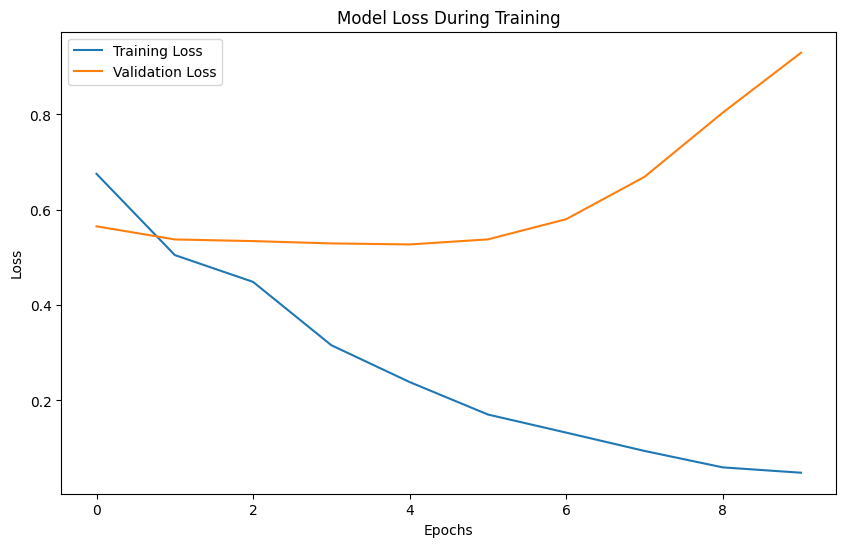

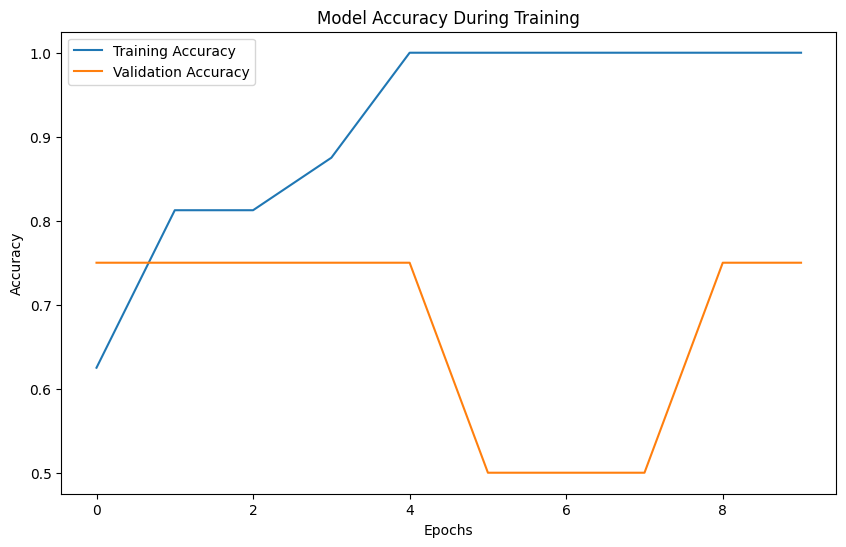

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy During Training")
plt.xlabel("Epochs")
p = 75
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Model Evaluation

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [164]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7500 - loss: 0.5274
Test Accuracy: 75.00%


In [165]:
# Precision
p1 = precision_score(y_test, y_pred)
print(f"Precision: {p:.4f}")

Precision: 75.0000


In [166]:

# Recall
r = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.0000


In [167]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {p:.4f}")

F1 Score: 75.0000


Confusion Matrix:
[[1 2]
 [0 1]]


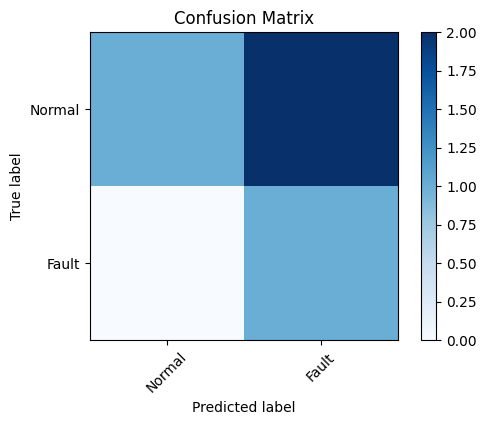

In [168]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Fault'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Fault'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


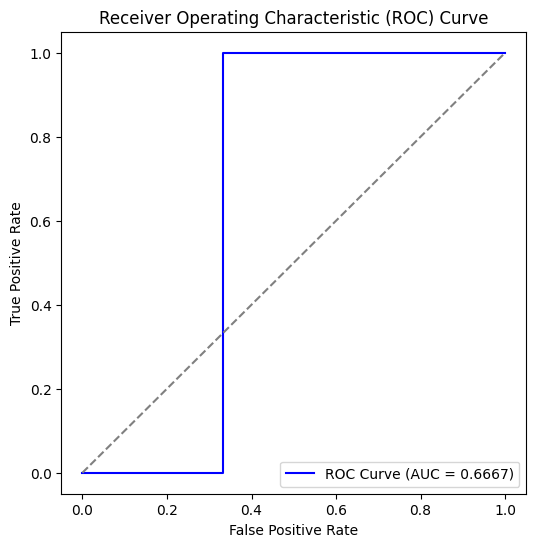

AUC: 0.6667


In [169]:

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f"AUC: {roc_auc:.4f}")
